In [209]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# the matplotlib inline allows you to display all graphs in Jupyter Notebooks
# the matplotlib.pyplot import allows you to manipulate plot, can use interface to generate plot

## Traffic Count
The last metrics of our project is the traffic count in the city. Heavy traffic may be annoying in most of the situations. Not only is it a huge waste of time, the incidental traffic accidents may cause humanity all kinds of lost, including prosperity and lives. When chosing neighborhoods, people tend to prefer those with less traffic rate.

In the nice neighborhoods, there must be thorough regulations and rulers' full attention on traffic control. As long as the governers perform their own jobs.

In [210]:
# create the initial read in file
traffic_count = pd.read_csv("CSVs/TrafficCountData.csv") 
neighb = pd.read_csv("CSVs/Neighborhoods.csv")

# display dataset
traffic_count.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6,42003060500,6,6,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9,42003090200,2,9,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28,42003563000,5,28,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14,42003140800,3,14,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26,42003260200,1,26,1.0,1-15


In [211]:
neighborhood = traffic_count[["neighborhood"]]
print(neighborhood.groupby("neighborhood").size())

neighborhood
Allegheny Center       1
Allegheny West         1
Arlington              3
Banksville             1
Beechview              4
                      ..
Upper Hill             3
Upper Lawrenceville    1
West Oakland           1
Westwood               4
Windgap                3
Length: 69, dtype: int64


To determine the most satisfying neighborhoods according to their traffic counts, the simplest way is to compare through the whole dataset and rank the top neighborhoods with the least average daily traffic. The first dataframe average_traffic adds up the traffic counts within the same neighborhoods and clculates the mean.

In [212]:
# group data set to find out each neighborhood's average daily car traffic
traffic_count = traffic_count[["neighborhood", "average_daily_car_traffic"]]

# GROUP BY NEIGHBORHOOD AND THEN CALCULATE THE MEAN OF THE TRAFFIC
average_traffic = traffic_count.groupby("neighborhood").mean()

# YOU GET AVERAGE TRAFFIC AMOUNT
average_traffic

,average_daily_car_traffic
neighborhood,
Allegheny Center,2386.000000
Allegheny West,477.000000
Arlington,2285.500000
Banksville,NaN
Beechview,1418.333333
...,...
Upper Hill,953.333333
Upper Lawrenceville,NaN
West Oakland,NaN


To determine the average daily car traffic more fairly, the Pitteburgh neighborhood dataset is merged for the area of each neighborhood. The second new dataframe traffic contains the neighborhoods' area and their average daily car traffic info. Then the new variable traffic_rate is used to represent the average daily car traffic per area in every neighborhood.

In [213]:
# MERGE WITH NEIGHBORHOOD DATA SO THAT YOU MERGE ON THE NEIGHBORHOOD
traffic = pd.merge(average_traffic, neighb, how='right', on='neighborhood')
traffic = traffic[["neighborhood", "area", "average_daily_car_traffic"]]
traffic

,neighborhood,area,average_daily_car_traffic
0,Chateau,10688264.0,NaN
1,Summer Hill,12232021.0,NaN
2,Northview Heights,8739570.0,NaN
3,Spring Hill-City View,17550592.0,63.00
4,Perry South,25220622.0,3018.75
...,...,...,...
85,Overbrook,23393388.0,777.00
86,Chartiers City,3683600.5,NaN
87,Esplen,6409852.5,NaN
88,Ridgemont,10278895.0,NaN


In [214]:
# TAKE THE AVERGAE TRAFFIC AMOUNT AND DIVIDE BY NEIGHBORHOOD AREA TO STANDARDIZE DATA TO GET TRFFIC RATE PER AREA
temp = []
for index, row in traffic.iterrows():
    temp.append(row['average_daily_car_traffic']/row['area'])

# NAME["NEW COL NAME"] = DATA[TRAFFIC] / DATA[AREA]
traffic['traffic_rate'] = temp

# LOWER THE TRAFFIC RATE, THE BETTER
traffic

,neighborhood,area,average_daily_car_traffic,traffic_rate
0,Chateau,10688264.0,NaN,NaN
1,Summer Hill,12232021.0,NaN,NaN
2,Northview Heights,8739570.0,NaN,NaN
3,Spring Hill-City View,17550592.0,63.00,0.000004
4,Perry South,25220622.0,3018.75,0.000120
...,...,...,...,...
85,Overbrook,23393388.0,777.00,0.000033
86,Chartiers City,3683600.5,NaN,NaN
87,Esplen,6409852.5,NaN,NaN
88,Ridgemont,10278895.0,NaN,NaN


Lastly, the third dateframe trafficRank sorted the traffic dateframe according to the value of traffic rate.

In [222]:
# create a new data frame to arrange the neighborhoods according to averge daily car traffic counts
trafficRank = pd.DataFrame(traffic[["neighborhood", "traffic_rate"]].sort_values(by = "traffic_rate"))

# display data frame
trafficRank = trafficRank.fillna(0)
trafficRank

,neighborhood,traffic_rate
3,Spring Hill-City View,0.000004
61,South Side Flats,0.000004
19,Lincoln Place,0.000005
22,Lincoln-Lemington-Belmar,0.000025
20,New Homestead,0.000030
...,...,...
82,South Shore,0.000000
86,Chartiers City,0.000000
87,Esplen,0.000000
88,Ridgemont,0.000000


<AxesSubplot:>

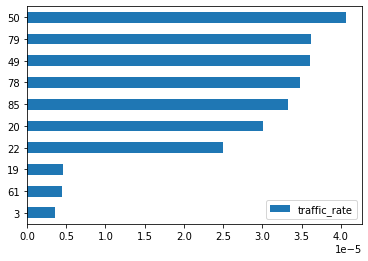

In [225]:
# display the data frame by plot graph
trafficRank.head(10).plot.barh()

Thus it can be declared that, according to the traffic counts, the best neighborhoods in Pitssburgh with the least traffic are:
1. Spring Hill-City View
2. South Side Flats
3. Lincoln Place
4. Lincoln-Lemington-Belmar
5. New Homestead

# plotting

<AxesSubplot:>

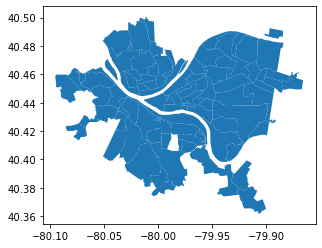

In [217]:
# create initial read in file
map_df = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
# crs for longitude and latitude
crs = "EPSG:4326"

# convert coordinate system to longitude and latitude
map_df = map_df.to_crs(crs)

#plotting the map of the shape file preview of the maps without data in it
map_df.plot()

In [218]:
# preview data
traffic.describe()

,area,average_daily_car_traffic,traffic_rate
count,8.900000e+01,61.000000,60.000000
mean,1.615615e+07,3462.277182,0.000301
std,1.278760e+07,3246.071485,0.000445
min,2.871538e+06,63.000000,0.000004
25%,7.785966e+06,1564.733333,0.000078
50%,1.198438e+07,2436.000000,0.000173
75%,2.101116e+07,4281.500000,0.000380
max,7.447013e+07,16729.000000,0.003119


<AxesSubplot:>

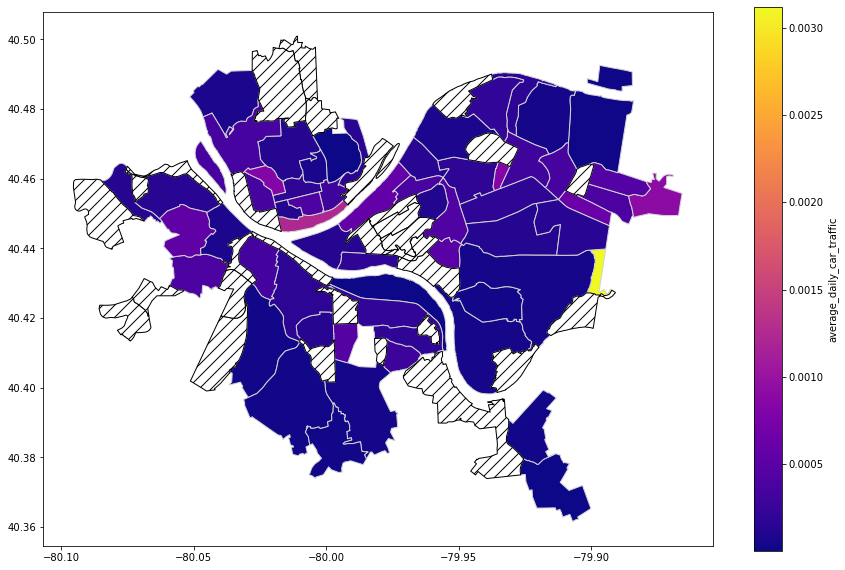

In [219]:
# merge the neighborhoods file for the map with crime rate data
traffic_map = map_df.merge(traffic, how = "left", left_on = "hood", 
                                right_on = "neighborhood") 

# display map
traffic_map.plot(column="traffic_rate",
               cmap = "plasma",
               edgecolor = "lightgrey", 
               legend = True,
               legend_kwds = {"label" : "average_daily_car_traffic"},
               missing_kwds = {
                         "color" : "white",
                         "edgecolor" : "black",
                         "hatch" : "//"},
               figsize = (15, 10)
              )